

# Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



relevant data used in the analysis include the following variables:

release_date

runtime	

genres

budget	

revenue

vote_average

vote_count


#### In this report i will explore these questions:

Which year has the highest release of movies?

What is the relationship between runtime and vote average?

What is the average of runtime?

Which Movie Has The Highest or Lowest Profit?

What is the Average Budget of the movies?




<a id='wrangling'></a>
## Data Wrangling


### General Properties

## Assessing the data

types and look for instances of missing or possibly errant data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
#Summary of Statistics
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
# Checking for duplicated rows across all columns.
sum(df.duplicated())

0

In [7]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


### Data Cleaning 

In [8]:
# copy dataframes for cleaning purposes
df_clean = df.copy()

In [9]:

# Deleting columns will not use

df_clean.drop(['homepage', 
'keywords',
'status',               
'tagline'], inplace=True, axis=1)

In [10]:
# Convert 'release_date' type from str to datetime 
df_clean["release_date"] = pd.to_datetime(df_clean["release_date"])

In [11]:
# Replace all values of 0 with NAN
df_clean = df_clean.replace(0, np.nan)

In [12]:
# Droping the null
df_clean = df_clean.dropna()

In [13]:
df_clean.fillna(df_clean.mean(), inplace =True)

In [14]:
df_clean.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.227000e+03,3227.000000,3227.000000,3.227000e+03,3227.000000,3227.000000,3227.000000
mean,4.067877e+07,44601.870778,29.051491,1.213181e+08,110.720793,6.313263,977.893090
std,4.439974e+07,74281.771931,36.169863,1.863361e+08,20.970364,0.859921,1414.538507
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,2.300000,1.000000
25%,1.050000e+07,4954.500000,10.475904,1.704008e+07,96.000000,5.800000,178.000000
50%,2.500000e+07,11442.000000,20.415572,5.519828e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,45256.000000,37.345773,1.463949e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 0 to 4798
Data columns (total 16 columns):
budget                  3227 non-null float64
genres                  3227 non-null object
id                      3227 non-null int64
original_language       3227 non-null object
original_title          3227 non-null object
overview                3227 non-null object
popularity              3227 non-null float64
production_companies    3227 non-null object
production_countries    3227 non-null object
release_date            3227 non-null datetime64[ns]
revenue                 3227 non-null float64
runtime                 3227 non-null float64
spoken_languages        3227 non-null object
title                   3227 non-null object
vote_average            3227 non-null float64
vote_count              3227 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(8)
memory usage: 428.6+ KB


### Due to cleaning purposes i have made these changes in my data:
copy dataframes for cleaning purposes

Deleting columns will not use in my analysis process (homepage, keywords, status, tagline)

Convert 'release_date' type from str to datetime 

Replace all values of 0 with NAN

Droping the null and fill them with the mean



<a id='eda'></a>
## Exploratory Data Analysis




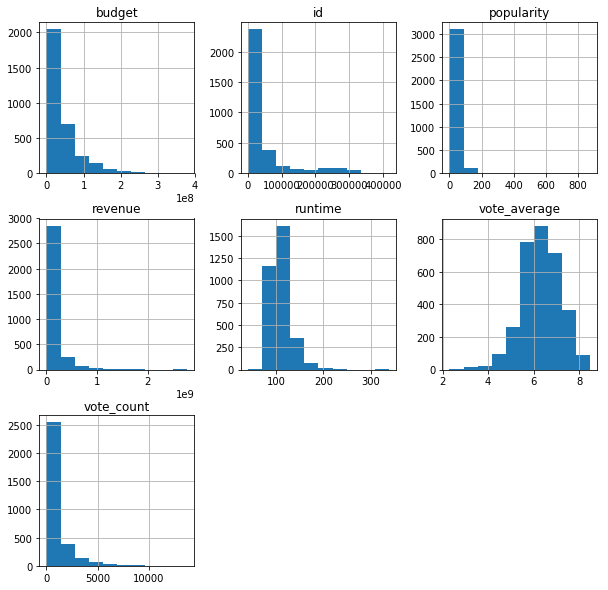

In [17]:
df_clean.hist(figsize=(10,10));

-revenue, value_count, budget are asymmtry distribution positive skewed which is right tail 

-vote_average is somehow negtive skewed which the mean is less than the median

## Which year has the highest release of movies?

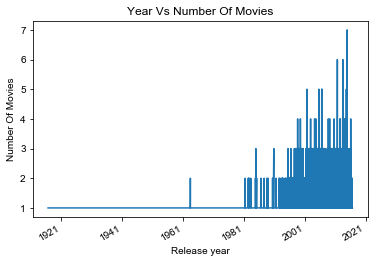

In [19]:

#make group of the data according to their release year and count the total number of movies in each year and plot.
df_clean.groupby('release_date').count()['id'].plot()

#set the figure size and labels
sns.set(rc={'figure.figsize':(40,10)})
plt.title("Year Vs Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
#set the style sheet
sns.set_style("whitegrid")

highest release is between 2001 and before 2021

## What is the relationship between runtime and vote average?


Text(0,0.5,'Runtime')

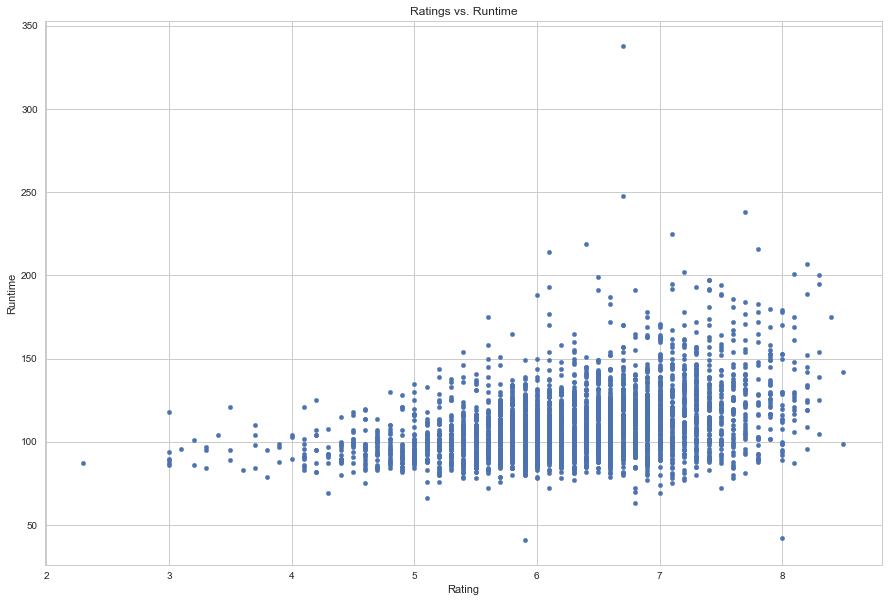

In [20]:

# Plot scatter plot of these two columns
df_clean.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Runtime')

- If it's a short film, it's likely to have a mid-to-high voting.

- The voting of films with a runtime of around 100 minutes are unpredictable, as they can run from low to high.

- movies with long runtimes consistently get higher-than-average voting.

#### so voting and runtime are correlated 

## what is the average of runtime?

In [21]:
#function to find average runtime
def runtime_avg(column):
    return df_clean[column].mean()
runtime_avg('runtime')

110.72079330647661

## Which Movie Has The Highest Or Lowest Profit?


In [23]:
#use the function 'idmin' to find the index of lowest and highest profit movie.

#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df_clean[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df_clean[x].idxmax()
    high = pd.DataFrame(df_clean.loc[high_index,:])
    low = pd.DataFrame(df_clean.loc[min_index,:])
    
    #print the movie with high and low profit
    print("The Highest Movie "+ x + " : ",df_clean['original_title'][high_index])
    print("The Lowest Movie "+ x + "  : ",df_clean['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

The Highest Movie Profit :  Avatar
The Lowest Movie Profit  :  The Lone Ranger


,0,13
budget,2.37e+08,2.55e+08
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
id,19995,57201
original_language,en,en
original_title,Avatar,The Lone Ranger
overview,"In the 22nd century, a paraplegic Marine is di...",The Texas Rangers chase down a gang of outlaws...
popularity,150.438,49.047
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00


- Movie Which Has Highest Profit : Avatar

- Movie Which Has Lowest Profit  :  The Lone Ranger


## What is the Average Budget of the movies?


- Average budget of movies is around 40 million

<a id='conclusions'></a>
## Conclusions



- highest release of movies in year is between 2001 and before 2021

- Movie Which Has Highest Profit :  Avatar

- Movie Which Has Lowest Profit  :  The Lone Ranger

- voting and runtime are correlated as If it's a short film, it's likely to have a mid-to-high voting, Movies with long runtimes consistently get higher-than-average voting, but the voting of films with a runtime of around 100 minutes are unpredictable.

- Average budget of movies is around 40 million

- Average runtime of movies is around is 110 min
 
### limitations:

- I have used TMBD Movies dataset for analysis and worked with release date, profit and runtime.
- my analysis is limited to the numerical values of revenue & budget.
- Dropping missing or Null values from variables of our interest might skew the analysis and could show unintentional bias towards the relationship being analyzed